In [1]:
import Pkg; Pkg.add("HTTP")
import Pkg; Pkg.add("JSON3")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
using HTTP
using JSON3

https://api.nbp.pl/api/exchangerates/rates/a/usd/2020-06-01/?format=json

In [3]:
query = "https://api.nbp.pl/api/exchangerates/rates/a/usd/" *
"2020-06-01/?format=json"

"https://api.nbp.pl/api/exchangerates/rates/a/usd/2020-06-01/?format=json"

In [4]:
response = HTTP.get(query)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Date: Mon, 13 Mar 2023 18:09:42 GMT
Cache-Control: no-cache
Pragma: no-cache
Content-Type: application/json; charset=utf-8
Expires: -1
ETag: "oq0l3lrzILdaDtzyaJ261mpYkflbl7DhJRILRmADc0I="
Vary: Accept-Encoding
Content-Encoding: gzip
Set-Cookie: ee3la5eizeiY4Eix=iePaevi0; path=/
Transfer-Encoding: chunked

{"table":"A","currency":"dolar amerykański","code":"USD","rates":[{"no":"105/A/NBP/2020","effectiveDate":"2020-06-01","mid":3.9680}]}"""

In [5]:
json = JSON3.read(response.body)

JSON3.Object{Vector{UInt8}, Vector{UInt64}} with 4 entries:
  :table    => "A"
  :currency => "dolar amerykański"
  :code     => "USD"
  :rates    => JSON3.Object[{…

In [9]:
typeof(json.table)

String

In [10]:
json.rates

1-element JSON3.Array{JSON3.Object, Vector{UInt8}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}}:
 {
              "no": "105/A/NBP/2020",
   "effectiveDate": "2020-06-01",
             "mid": 3.968
}

In [11]:
String(response.body)

"{\"table\":\"A\",\"currency\":\"dolar amerykański\",\"code\":\"USD\",\"rates\":[{\"no\":\"105/A/NBP/2020\",\"effectiveDate\":\"2020-06-01\",\"mid\":3.9680}]}"

In [12]:
response.body

UInt8[]

converting to String consumes it. No '!'

In [13]:
invalidQuery = "https://api.nbp.pl/api/exchangerates/rates/a/usd/" *
               "2020-06-06/?format=json"

"https://api.nbp.pl/api/exchangerates/rates/a/usd/2020-06-06/?format=json"

In [14]:
responseI = HTTP.get(invalidQuery)

LoadError: HTTP.Exceptions.StatusError(404, "GET", "/api/exchangerates/rates/a/usd/2020-06-06/?format=json", HTTP.Messages.Response:
"""
HTTP/1.1 404 Not Found
Date: Mon, 13 Mar 2023 18:15:25 GMT
Cache-Control: no-cache
Pragma: no-cache
Content-Length: 38
Content-Type: text/plain; charset=utf-8
Expires: -1

404 NotFound - Not Found - Brak danych""")

In [15]:
try
    responseI = HTTP.get(invalidQuery)
catch 
    print("error happened")
end

error happened

## Missing Data

> The Julia lan- guage (similarly to R, but unlike, for example, Python) is designed with a built-in con- cept of a missing value. In your code, you do not need to use sentinel values to represent the absence of data. You can easily check if a value is missing by using the ismissing function:

In [16]:
missing

missing

In [17]:
ismissing(missing)

true

In [14]:
12 + missing

missing

In [18]:
cos(missing)

missing

In [19]:
1 == missing

missing

In [20]:
if missing
   print("never happens")
else
    print("also never")
end

LoadError: TypeError: non-boolean (Missing) used in boolean context

In [21]:
missing && true

LoadError: TypeError: non-boolean (Missing) used in boolean context

> The design of handling missing in Julia requires you to explicitly decide whether missing should be treated as true or false. This is achieved with the coalesce function

In [22]:
coalesce(missing, true)

true

In [23]:
coalesce(missing, 1)

1

In [25]:
coalesce(4, 2)

4

In [24]:
coalesce(missing, "")

""

In [26]:
isequal(1, missing)

false

In [27]:
1 == missing

missing

In [29]:
missing == missing

missing

In [28]:
isequal(missing, missing)

true

In [31]:
1 > missing

missing

In [32]:
isless(Inf, missing)

true

In [30]:
isless(1, missing)


true

In [33]:
x = [1, missing, 3, 4, missing, 5, missing]

7-element Vector{Union{Missing, Int64}}:
 1
  missing
 3
 4
  missing
 5
  missing

In [34]:
coalesce.(x, 0)

7-element Vector{Int64}:
 1
 0
 3
 4
 0
 5
 0

In [35]:
sum(x)

missing

In [37]:
skipmissing(x)

skipmissing(Union{Missing, Int64}[1, missing, 3, 4, missing, 5, missing])

In [36]:
sum(skipmissing(x))

13

In [38]:
f(x::Int, y::Int) = x + y

f (generic function with 1 method)

In [39]:
f(12, missing)

LoadError: MethodError: no method matching f(::Int64, ::Missing)
[0mClosest candidates are:
[0m  f(::Int64, [91m::Int64[39m) at In[38]:1

In [40]:
import Pkg; Pkg.add("Missings")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [41]:
using Missings

In [42]:
f2 = passmissing(f)

(::Missings.PassMissing{typeof(f)}) (generic function with 2 methods)

In [43]:
f2(12, missing)

missing

## Getting time-series data from the NBP Web API

In [45]:
using Dates

In [46]:
d = Date("2020-12-01")

2020-12-01

In [47]:
year(d)

2020

In [48]:
day(d)

1

In [49]:
dayname(d), dayofweek(d), dayofmonth(d)

("Tuesday", 2, 1)

In [50]:
Date.(2022, 9, 1:30)

30-element Vector{Date}:
 2022-09-01
 2022-09-02
 2022-09-03
 2022-09-04
 2022-09-05
 2022-09-06
 2022-09-07
 2022-09-08
 2022-09-09
 2022-09-10
 2022-09-11
 2022-09-12
 2022-09-13
 ⋮
 2022-09-19
 2022-09-20
 2022-09-21
 2022-09-22
 2022-09-23
 2022-09-24
 2022-09-25
 2022-09-26
 2022-09-27
 2022-09-28
 2022-09-29
 2022-09-30

In [52]:
Date.(2022, 9, 1:35)

LoadError: ArgumentError: Day: 31 out of range (1:30)

In [53]:
today()

2023-03-13

In [54]:
today() + Day(7)

2023-03-20

In [55]:
today() + Year(12) + Day(14)

2035-03-27

In [56]:
today():(today() + Year(1))

LoadError: MethodError: [0mCannot `convert` an object of type [92mInt64[39m[0m to an object of type [91mDay[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Dates.CompoundPeriod[39m) where T<:Period at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Dates/src/periods.jl:363
[0m  convert(::Type{Day}, [91m::Week[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Dates/src/periods.jl:433
[0m  convert(::Type{Day}, [91m::Hour[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/Dates/src/periods.jl:441
[0m  ...

In [57]:
today():Day(1):(today() + Year(1))

Date("2023-03-13"):Day(1):Date("2024-03-13")

In [58]:
collect(today():Day(1):(today() + Year(1) - Day(1)))

366-element Vector{Date}:
 2023-03-13
 2023-03-14
 2023-03-15
 2023-03-16
 2023-03-17
 2023-03-18
 2023-03-19
 2023-03-20
 2023-03-21
 2023-03-22
 2023-03-23
 2023-03-24
 2023-03-25
 ⋮
 2024-03-01
 2024-03-02
 2024-03-03
 2024-03-04
 2024-03-05
 2024-03-06
 2024-03-07
 2024-03-08
 2024-03-09
 2024-03-10
 2024-03-11
 2024-03-12

In [62]:
only([2])

2

In [59]:
?only

search: only ReadOnlyMemoryError isreadonly download Clonglong @noinline



```
only(x)
```

Return the one and only element of collection `x`, or throw an [`ArgumentError`](@ref) if the collection has zero or multiple elements.

See also [`first`](@ref), [`last`](@ref).

!!! compat "Julia 1.4"
    This method requires at least Julia 1.4.


# Examples

```jldoctest
julia> only(["a"])
"a"

julia> only("a")
'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

julia> only(())
ERROR: ArgumentError: Tuple contains 0 elements, must contain exactly 1 element
Stacktrace:
[...]

julia> only(('a', 'b'))
ERROR: ArgumentError: Tuple contains 2 elements, must contain exactly 1 element
Stacktrace:
[...]
```


In [63]:
function get_rate(date::Date)
    query = "https://api.nbp.pl/api/exchangerates/rates/a/usd/$date/?format=json"
    try
        response = HTTP.get(query)
        json = JSON3.read(response.body)
        return only(json.rates).mid
    catch e
        if e isa HTTP.ExceptionRequest.StatusError
            return missing
        end
    end
end

get_rate (generic function with 1 method)

In [64]:
rates = get_rate.(Date.(2022, 9, 1:30))

30-element Vector{Union{Missing, Float64}}:
 4.6959
 4.7276
  missing
  missing
 4.769
 4.7367
 4.7584
 4.7268
 4.6599
  missing
  missing
 4.6225
 4.6363
 ⋮
 4.7255
 4.7118
 4.7919
 4.8343
 4.8796
  missing
  missing
 4.9113
 4.9476
 5.0381
 5.0328
 4.9533

In [65]:
using Statistics

In [66]:
mean(rates)

missing

In [67]:
mean(skipmissing(rates))

4.788236363636363

In [68]:
std(skipmissing(rates))

0.12121170203390673

In [69]:
using FreqTables

In [70]:
dates = Date.(2022, 9, 1:30)

30-element Vector{Date}:
 2022-09-01
 2022-09-02
 2022-09-03
 2022-09-04
 2022-09-05
 2022-09-06
 2022-09-07
 2022-09-08
 2022-09-09
 2022-09-10
 2022-09-11
 2022-09-12
 2022-09-13
 ⋮
 2022-09-19
 2022-09-20
 2022-09-21
 2022-09-22
 2022-09-23
 2022-09-24
 2022-09-25
 2022-09-26
 2022-09-27
 2022-09-28
 2022-09-29
 2022-09-30

In [71]:
?proptable

search: proptable



```
proptable(x::AbstractVector...;
          margins = nothing,
          skipmissing::Bool = false,
          weights::AbstractVector{<:Real} = UnitWeights(),
          subset::Union{Nothing, AbstractVector{Int}, AbstractVector{Bool}} = nothing])

proptable(t, cols::Union{Symbol, AbstractString}...;
          margins = nothing,
          skipmissing::Bool = false,
          weights::AbstractVector{<:Real} = UnitWeights(),
          subset::Union{Nothing, AbstractVector{Int}, AbstractVector{Bool}} = nothing])
```

Create a frequency table of proportions from vectors or table columns. This is equivalent to calling `prop(freqtable(...), margins=margins)`.

`t` can be any type of table supported by the [Tables.jl](https://github.com/JuliaData/Tables.jl) interface.

If `margins` is `nothing` (the default), proportions over the whole table are computed. If `margins` is an `Integer`, or an iterable of `Integer`s, proportions sum to `1` over dimensions specified by `margins`. In particular for a two-dimensional array, when `margins` is `1` row proportions are calculated, and when `margins` is `2` column proportions are calculated.

Calculating `sum(proptable(..., margins=margins), dims=dims)` with `dims` equal to the complement of `margins` produces an array containing only `1.0` (see last example below).

**Examples**

```jldoctest
julia> proptable([1, 2, 2, 3, 4, 3])
4-element Named Array{Float64,1}
Dim1  │ 
──────┼─────────
1     │ 0.166667
2     │ 0.333333
3     │ 0.333333
4     │ 0.166667

julia> df = DataFrame(x=[1, 2, 2, 2, 1, 1], y=[1, 2, 1, 2, 2, 2], z=[1, 1, 1, 2, 2, 1]);

julia> proptable(df, :x, :y)
2×2 Named Array{Float64,2}
x ╲ y │        1         2
──────┼───────────────────
1     │ 0.166667  0.333333
2     │ 0.166667  0.333333

julia> proptable(df, :x, :y, subset=df.x .> 1)
1×2 Named Array{Float64,2}
x ╲ y │        1         2
──────┼───────────────────
2     │ 0.333333  0.666667

julia> proptable([1, 2, 2, 2], [1, 1, 1, 2], margins=1)
2×2 Named Array{Float64,2}
Dim1 ╲ Dim2 │        1         2
────────────┼───────────────────
1           │      1.0       0.0
2           │ 0.666667  0.333333

julia> proptable([1, 2, 2, 2], [1, 1, 1, 2], margins=2)
2×2 Named Array{Float64,2}
Dim1 ╲ Dim2 │        1         2
────────────┼───────────────────
1           │ 0.333333       0.0
2           │ 0.666667       1.0

julia> proptable([1, 2, 2, 2], [1, 1, 1, 2], margins=(1,2))
2×2 Named Array{Float64,2}
Dim1 ╲ Dim2 │   1    2
────────────┼─────────
1           │ 1.0  NaN
2           │ 1.0  1.0

julia> proptable(df.x, df.y, df.z)
2×2×2 Named Array{Float64,3}

[:, :, Dim3=1] =
Dim1 ╲ Dim2 │        1         2
────────────┼───────────────────
1           │ 0.166667  0.166667
2           │ 0.166667  0.166667

[:, :, Dim3=2] =
Dim1 ╲ Dim2 │        1         2
────────────┼───────────────────
1           │      0.0  0.166667
2           │      0.0  0.166667

julia> pt = proptable(df.x, df.y, df.z, margins=(1,2))
2×2×2 Named Array{Float64,3}

[:, :, Dim3=1] =
Dim1 ╲ Dim2 │   1    2
────────────┼─────────
1           │ 1.0  0.5
2           │ 1.0  0.5

[:, :, Dim3=2] =
Dim1 ╲ Dim2 │   1    2
────────────┼─────────
1           │ 0.0  0.5
2           │ 0.0  0.5

julia> sum(pt, dims=3)
2×2×1 Named Array{Float64,3}

[:, :, Dim3=sum(Dim3)] =
Dim1 ╲ Dim2 │   1    2
────────────┼─────────
1           │ 1.0  1.0
2           │ 1.0  1.0

```


In [72]:
proptable(dayname.(dates), ismissing.(rates); margins=1)

7×2 Named Matrix{Float64}
Dim1 ╲ Dim2 │ false   true
────────────┼─────────────
Friday      │   1.0    0.0
Monday      │   1.0    0.0
Saturday    │   0.0    1.0
Sunday      │   0.0    1.0
Thursday    │   1.0    0.0
Tuesday     │   1.0    0.0
Wednesday   │   1.0    0.0

Book uses below example, but won't work for dates I chose:

In [74]:
dates[dayname.(dates) .== "Thursday" .&& ismissing.(rates)]

Date[]

In [75]:
using Plots

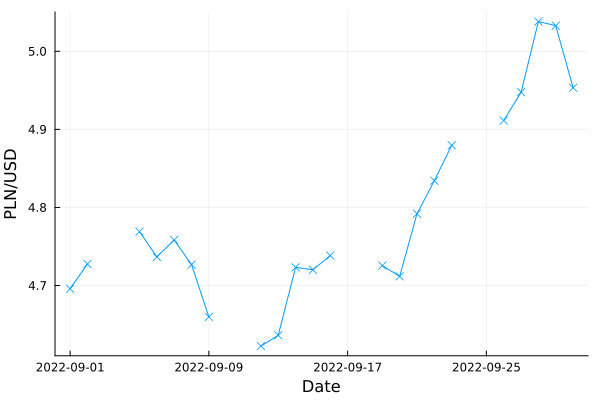

In [76]:
plot(dates, rates; xlabel="Date", ylabel="PLN/USD", legend=false, marker=:x)

In [81]:
.![true, false, true]

# !.[true, false] # ????

3-element BitVector:
 0
 1
 0

In [82]:
has_rates = .!ismissing.(rates)

30-element BitVector:
 1
 1
 0
 0
 1
 1
 1
 1
 1
 0
 0
 1
 1
 ⋮
 1
 1
 1
 1
 1
 0
 0
 1
 1
 1
 1
 1

Unpacking:

```julia
.!ismissing.(rates)
```

* For a single value passed, !ismissing is a negation of the return value produced by the ismissing function
* We need to prefix the bang (!) operator with a dot (.) to broadcast it
* We need to suffix the dot (.) to the ismissing part

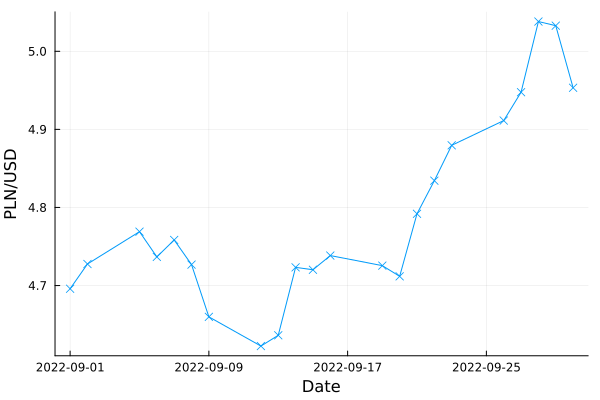

In [83]:
plot(dates[has_rates], rates[has_rates]; xlabel="Date", ylabel="PLN/USD", legend=false, marker=:x)

In [84]:
import Pkg; Pkg.add("Impute")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [85]:
using Impute

https://invenia.github.io/Impute.jl/latest/

In [86]:
rates_filled = Impute.interp(rates)

30-element Vector{Union{Missing, Float64}}:
 4.6959
 4.7276
 4.7414
 4.755199999999999
 4.769
 4.7367
 4.7584
 4.7268
 4.6599
 4.647433333333334
 4.634966666666667
 4.6225
 4.6363
 ⋮
 4.7255
 4.7118
 4.7919
 4.8343
 4.8796
 4.8901666666666666
 4.900733333333333
 4.9113
 4.9476
 5.0381
 5.0328
 4.9533

> The Impute.jl package has many more features that facilitate handling of missing data

See https://github.com/invenia/ Impute.jl

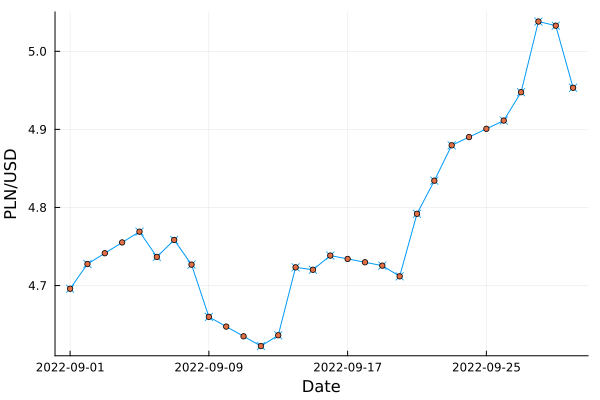

In [87]:
scatter!(dates, rates_filled, markersize=3)

In [74]:
?scatter!

search: scatter! scatter3d! scatterhist! scatter scatter3d scatterhist



```
scatter(x,y)
scatter!(x,y)
```

Make a scatter plot of `y` vs `x`.

# Keyword arguments

  * `markersize::Union{Real, AbstractVector}`: Size (radius                pixels) of the markers. Aliases: (:markersizes, :ms,                :msize).
  * `markercolor::Union{Integer, Symbol,                 ColorSchemes.ColorScheme, ColorTypes.Colorant}`: Color of the                 interior of the marker or shape. `:match` will take                 the value from `:seriescolor`. Aliases:                 (:markercolors, :markercolour, :mc, :mcolor, :mcolour).
  * `markershape::Union{Symbol, Plots.Shape, AbstractVector}`:                 Choose from [:none, :auto, :circle, :rect, :star5,                 :diamond, :hexagon, :cross, :xcross, :utriangle,                 :dtriangle, :rtriangle, :ltriangle, :pentagon,                 :heptagon, :octagon, :star4, :star6, :star7, :star8,                 :vline, :hline, :+, :x]. Aliases: (:markershapes,                 :shape).
  * `markeralpha::Real`: The alpha/opacity override for the                 marker interior. `nothing` (the default) means it                 will take the alpha value of markercolor.                 Aliases: (:ma, :malpha, :markeralphas,                 :markeropacity, :mopacity, :mα).

# Examples

```julia-repl
julia> scatter([1,2,3],[4,5,6],markersize=[3,4,5],markercolor=[:red,:green,:blue])
julia> scatter([(1,4),(2,5),(3,6)])
```


Why `scatter!` ?

This updates previous plot

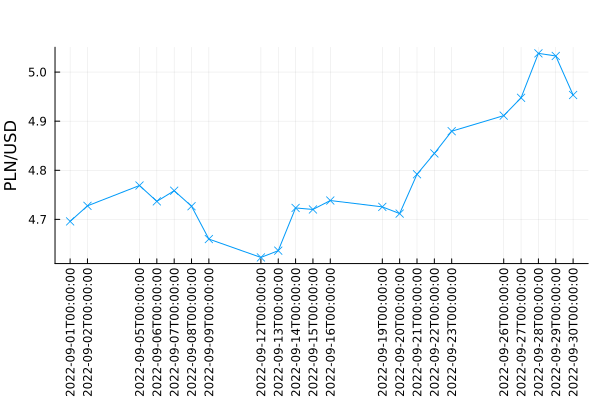

In [88]:
plot(dates[has_rates], rates[has_rates]; xlabel="Dates", ylabel="PLN/USD", legend=false, marker=:x,
            xticks=dates[has_rates], xrot=90, bottommargin=5Plots.mm, topmargin=10Plots.mm)

Yeah this seems to be saying 5mm(!)

In [92]:
5Plots.mm

5.0mm

In [97]:
h(x) = 4x + 5x^2

h (generic function with 1 method)

In [98]:
h(2)

28

## EXERCISE 7.3 

The NBP Web API allows you to get a sequence of rates for a period of dates. For example, the query "https://api.nbp.pl/api/exchangerates/rates/a/usd/2020-06-01/2020-06-30/?format=json" returns a sequence of rates from June 2020 for dates when the rate is present; in other words, dates for which there is no rate are skipped. Your task is to parse the result of this query and confirm that the obtained result is consistent with the data we collected in the dates and rates vectors.

In [100]:
startdate = Date("2022-10-01")
enddate = Date("2022-10-31")

query = "https://api.nbp.pl/api/exchangerates/rates/a/usd/$startdate/$enddate/?format=json"
query

"https://api.nbp.pl/api/exchangerates/rates/a/usd/2022-10-01/2022-10-31/?format=json"

In [101]:
response = HTTP.get(query)

HTTP.Messages.Response:
"""
HTTP/1.1 200 OK
Date: Mon, 13 Mar 2023 18:47:51 GMT
Cache-Control: no-cache
Pragma: no-cache
Content-Length: 348
Content-Type: application/json; charset=utf-8
Content-Encoding: gzip
Expires: -1
ETag: "dMbEOi0YvPEpbq/ENwAkYOBJJQnyRmX8likqoPde+3Q="

{"table":"A","currency":"dolar amerykański","code":"USD","rates":[{"no":"191/A/NBP/2022","effectiveDate":"2022-10-03","mid":4.9207},{"no":"192/A/NBP/2022","effectiveDate":"2022-10-04","mid":4.8615},{"no":"193/A/NBP/2022","effectiveDate":"2022-10-05","mid":4.8380},{"no":"194/A/NBP/2022","effectiveDate":"2022-10-06","mid":4.8989},{"no":"195/A/NBP/2022","effectiveDate":"2022-10-07","mid":4.9588},{"no":"196/A/NBP/2022","effectiveDate":"2022-10-10","mid":5.0239},{"no":"197/A/NBP/2022","effectiveDate":"2022-10-11","mid":5.0171},{"no":"198/A/NBP/2022","effectiveDate":"2022-10-12","mid":5.0014},{"no":"199/A/NBP/2022","effectiveDate":"2022-10-13","mid":4.9905},{"no":"200/A/NBP/2022","effectiveDate":"2022-10-14","mid":4.9569

In [103]:
data = JSON3.read(response.body)

JSON3.Object{Vector{UInt8}, Vector{UInt64}} with 4 entries:
  :table    => "A"
  :currency => "dolar amerykański"
  :code     => "USD"
  :rates    => JSON3.Object[{…

In [104]:
data.rates

21-element JSON3.Array{JSON3.Object, Vector{UInt8}, SubArray{UInt64, 1, Vector{UInt64}, Tuple{UnitRange{Int64}}, true}}:
 {
              "no": "191/A/NBP/2022",
   "effectiveDate": "2022-10-03",
             "mid": 4.9207
}
 {
              "no": "192/A/NBP/2022",
   "effectiveDate": "2022-10-04",
             "mid": 4.8615
}
 {
              "no": "193/A/NBP/2022",
   "effectiveDate": "2022-10-05",
             "mid": 4.838
}
 {
              "no": "194/A/NBP/2022",
   "effectiveDate": "2022-10-06",
             "mid": 4.8989
}
 {
              "no": "195/A/NBP/2022",
   "effectiveDate": "2022-10-07",
             "mid": 4.9588
}
 {
              "no": "196/A/NBP/2022",
   "effectiveDate": "2022-10-10",
             "mid": 5.0239
}
 {
              "no": "197/A/NBP/2022",
   "effectiveDate": "2022-10-11",
             "mid": 5.0171
}
 {
              "no": "198/A/NBP/2022",
   "effectiveDate": "2022-10-12",
             "mid": 5.0014
}
 {
              "no": "199/A/NBP/2022",
   "eff

In [109]:
function get_rate(startdate::Date, enddate::Date)
    query = "https://api.nbp.pl/api/exchangerates/rates/a/usd/$startdate/$enddate/?format=json"
    response = HTTP.get(query)
    json = JSON3.read(response.body)
    
    map(json.rates) do item 
       (date=Date(item.effectiveDate), rate=item.mid) 
    end
end

get_rate (generic function with 2 methods)

In [110]:
get_rate(startdate, enddate)

21-element Vector{NamedTuple{(:date, :rate), Tuple{Date, Float64}}}:
 (date = Date("2022-10-03"), rate = 4.9207)
 (date = Date("2022-10-04"), rate = 4.8615)
 (date = Date("2022-10-05"), rate = 4.838)
 (date = Date("2022-10-06"), rate = 4.8989)
 (date = Date("2022-10-07"), rate = 4.9588)
 (date = Date("2022-10-10"), rate = 5.0239)
 (date = Date("2022-10-11"), rate = 5.0171)
 (date = Date("2022-10-12"), rate = 5.0014)
 (date = Date("2022-10-13"), rate = 4.9905)
 (date = Date("2022-10-14"), rate = 4.9569)
 (date = Date("2022-10-17"), rate = 4.9522)
 (date = Date("2022-10-18"), rate = 4.8929)
 (date = Date("2022-10-19"), rate = 4.8892)
 (date = Date("2022-10-20"), rate = 4.9024)
 (date = Date("2022-10-21"), rate = 4.9)
 (date = Date("2022-10-24"), rate = 4.8669)
 (date = Date("2022-10-25"), rate = 4.8499)
 (date = Date("2022-10-26"), rate = 4.7538)
 (date = Date("2022-10-27"), rate = 4.7216)
 (date = Date("2022-10-28"), rate = 4.7477)
 (date = Date("2022-10-31"), rate = 4.734)

In [115]:
ismissing(missing)

true

In [117]:
haskey(d, "b")

false

In [114]:
d = Dict("a" => 1)
d["b"]

LoadError: KeyError: key "b" not found

In [118]:
function get_rate2(startdate::Date, enddate::Date)
    query = "https://api.nbp.pl/api/exchangerates/rates/a/usd/$startdate/$enddate/?format=json"
    response = HTTP.get(query)
    json = JSON3.read(response.body)
    
    
    dates = startdate:Day(1):enddate
    
    data = Dict{Date, Float64}()
    
    foreach(json.rates) do item 
        data[Date(item.effectiveDate)] = item.mid
    end
    
    map(dates) do d 
       if haskey(data, d)
            (date=d, rate=data[d])
        else
            (date=d, rate=missing)
        end
    end
end

get_rate2 (generic function with 1 method)

In [119]:
get_rate2(startdate, enddate)

31-element Vector{NamedTuple{(:date, :rate)}}:
 (date = Date("2022-10-01"), rate = missing)
 (date = Date("2022-10-02"), rate = missing)
 (date = Date("2022-10-03"), rate = 4.9207)
 (date = Date("2022-10-04"), rate = 4.8615)
 (date = Date("2022-10-05"), rate = 4.838)
 (date = Date("2022-10-06"), rate = 4.8989)
 (date = Date("2022-10-07"), rate = 4.9588)
 (date = Date("2022-10-08"), rate = missing)
 (date = Date("2022-10-09"), rate = missing)
 (date = Date("2022-10-10"), rate = 5.0239)
 (date = Date("2022-10-11"), rate = 5.0171)
 (date = Date("2022-10-12"), rate = 5.0014)
 (date = Date("2022-10-13"), rate = 4.9905)
 ⋮
 (date = Date("2022-10-20"), rate = 4.9024)
 (date = Date("2022-10-21"), rate = 4.9)
 (date = Date("2022-10-22"), rate = missing)
 (date = Date("2022-10-23"), rate = missing)
 (date = Date("2022-10-24"), rate = 4.8669)
 (date = Date("2022-10-25"), rate = 4.8499)
 (date = Date("2022-10-26"), rate = 4.7538)
 (date = Date("2022-10-27"), rate = 4.7216)
 (date = Date("2022-10-2

# Coming in Part 2

* Chapter 8 teaches you how to create a data frame from a CSV file and basic operations. How to process data in the Apache Arrow and SQLite databases, work with compressed files
* Chapter 9 teaches you how to select rows and columns from a data frame. You will also learn how to build and visualize locally estimated scatterplot smoothing (LOESS) regression models.
* Chapter 10 covers various ways of creating new data frames. It discusses the Tables.jl interface, an implementation-independent abstraction of a table concept.
* Chapter 11 teaches you how to convert data frames into objects of other types, like grouped data frame. General concepts of type-stable code and type piracy.
* Chapter 12 focuses on transformation and mutation of data frame objects—in particular, using the split-apply-combine strategy. Graphs.jl package to work with graph data.
* Chapter 13 advanced data frame transformation things in DataFrames.jl package, chain multiple operations in data processing pipelines. Categorical data and classification models in Julia.
* Chapter 14 shows how to build a web service in Julia. And how to implement Monte Carlo simulations leveraging Julia’s multithreading capabilities.